In [0]:
!pip install geopandas

In [0]:
import pandas as pd
import urllib
import geopandas as gpd

In [0]:
crime_url = 'https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD'
urllib.request.urlretrieve(crime_url, "crimes.csv")

('crimes.csv', <http.client.HTTPMessage at 0x7f5603da1588>)

In [0]:
crimes_df = pd.read_csv('crimes.csv')

In [0]:
crimes_df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,457872064,113,QUEENS,06/30/2018,23:30:00,06/30/2018,23:40:00,COMPLETED,NaN,NaN,...,M,NaN,18-24,BLACK,F,1048111.0,188479.0,40.683786,-73.769746,"(40.68378593, -73.769745503)"
1,271939965,115,QUEENS,06/30/2018,23:20:00,06/30/2018,23:25:00,COMPLETED,NaN,NaN,...,M,NaN,18-24,ASIAN/PAC.ISL,M,1017940.0,214837.0,40.756298,-73.878397,"(40.756298483, -73.878397328)"
2,862644726,94,BROOKLYN,06/30/2018,23:09:00,06/30/2018,23:25:00,COMPLETED,NaN,NaN,...,M,NaN,45-64,ASIAN/PAC.ISL,M,997245.0,204130.0,40.726965,-73.953117,"(40.726965067, -73.953116629)"
3,354814756,41,BRONX,06/30/2018,23:00:00,06/30/2018,23:19:00,COMPLETED,NaN,NaN,...,M,NaN,UNKNOWN,UNKNOWN,E,1012522.0,239685.0,40.824519,-73.897849,"(40.824518508, -73.897849003)"
4,963900505,43,BRONX,06/30/2018,23:00:00,06/30/2018,23:29:00,COMPLETED,MONROE,911.0,...,M,NaN,18-24,WHITE HISPANIC,F,1021060.0,238980.0,40.822552,-73.867003,"(40.822552032, -73.867003392)"


In [0]:
#crimes_df['crime_date'] = crimes_df['CMPLNT_FR_DT'] + crimes_df['CMPLNT_FR_TM']

#crimes_df_date['crime_date'] = pd.to_datetime(crimes_df['CMPLNT_FR_DT'])

#starting year = 2006:
crimes_df['yearoc'] = crimes_df['CMPLNT_FR_DT'].str[-4:]



In [0]:
crimes_df['yearoc'] = crimes_df['yearoc'].astype(int)

crimes_post2006 = crimes_df[crimes_df['yearoc'] >= 2006]

In [0]:
# convert the date to datetime
#crimes_post2006['crime_date'] = crimes_post2006['CMPLNT_FR_DT'] + ' ' + crimes_post2006['CMPLNT_FR_TM']

crimes_post2006['crime_date'] = pd.to_datetime(crimes_post2006['CMPLNT_FR_DT'] + ' ' + crimes_post2006['CMPLNT_FR_TM'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#group number of crimes by offense type at precinct level at date and hour:
crimes_post2006['hour'] = crimes_post2006['crime_date'].dt.hour
crimes_post2006['date_crime'] = crimes_post2006['crime_date'].dt.date


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
crimes_post2006.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,yearoc,crime_date,hour,date_crime
0,457872064,113,QUEENS,06/30/2018,23:30:00,06/30/2018,23:40:00,COMPLETED,NaN,NaN,...,F,1048111.0,188479.0,40.683786,-73.769746,"(40.68378593, -73.769745503)",2018,2018-06-30 23:30:00,23,2018-06-30
1,271939965,115,QUEENS,06/30/2018,23:20:00,06/30/2018,23:25:00,COMPLETED,NaN,NaN,...,M,1017940.0,214837.0,40.756298,-73.878397,"(40.756298483, -73.878397328)",2018,2018-06-30 23:20:00,23,2018-06-30
2,862644726,94,BROOKLYN,06/30/2018,23:09:00,06/30/2018,23:25:00,COMPLETED,NaN,NaN,...,M,997245.0,204130.0,40.726965,-73.953117,"(40.726965067, -73.953116629)",2018,2018-06-30 23:09:00,23,2018-06-30
3,354814756,41,BRONX,06/30/2018,23:00:00,06/30/2018,23:19:00,COMPLETED,NaN,NaN,...,E,1012522.0,239685.0,40.824519,-73.897849,"(40.824518508, -73.897849003)",2018,2018-06-30 23:00:00,23,2018-06-30
4,963900505,43,BRONX,06/30/2018,23:00:00,06/30/2018,23:29:00,COMPLETED,MONROE,911.0,...,F,1021060.0,238980.0,40.822552,-73.867003,"(40.822552032, -73.867003392)",2018,2018-06-30 23:00:00,23,2018-06-30


In [0]:
top_precincts = crimes_post2006.groupby(['ADDR_PCT_CD' ])[['CMPLNT_NUM','crime_date']].count().reset_index().sort_values(by=['CMPLNT_NUM'],ascending=False)[0:5]
top_precinct_ids = top_precincts['ADDR_PCT_CD'].values.tolist()

In [0]:
top_precinct_ids

[75, 44, 40, 14, 43]

In [0]:
crimes_precinct_type75 = crimes_post2006[crimes_post2006['ADDR_PCT_CD'] == 75].groupby(['ADDR_PCT_CD' ,'date_crime'])[['CMPLNT_NUM']].count()
crimes_precinct_type75.reset_index(inplace=True)


CMPLNT_NUM
ADDR_PCT_CD date_crime            
75          2007-03-07           1
            2011-03-13           1
            2012-05-11           1
            2013-03-29           1
            2013-12-10           1

In [0]:
crimes_precinct_type75.reset_index(inplace=True)

In [0]:
precinct_id_1_dmax = crimes_precinct_type75['date_crime'].max()
precinct_id_1_dmin= crimes_precinct_type75['date_crime'].min()

In [0]:
date_rng = pd.date_range(start=precinct_id_1_dmin, end=precinct_id_1_dmax, freq='D')

date_rng_df = pd.DataFrame(date_rng, columns=['date'])
date_rng_df.set_index('date',inplace=True)

In [0]:
crimes_precinct_type75.set_index('date_crime',inplace=True)
crimes_precinct_type75.drop(['ADDR_PCT_CD'],axis=1,inplace=True)

In [0]:
prefinal_datset_precinct75 = date_rng_df.merge(crimes_precinct_type75, left_index=True, right_index=True, how='left')
prefinal_datset_precinct75.fillna(0,inplace=True)

In [0]:
prefinal_datset_precinct75.head()

,CMPLNT_NUM
date,
2007-03-07,1.0
2007-03-08,0.0
2007-03-09,0.0
2007-03-10,0.0
2007-03-11,0.0


In [0]:
#perform time series analysis:
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

#prefinal_datset_precinct1.plot()


prefinal_datset_precinct75['log_crime'] = np.log(prefinal_datset_precinct75.CMPLNT_NUM.values + 1)

#prefinal_datset_precinct1['CMPLNT_NUM'].plot()
prefinal_datset_precinct75.reset_index(inplace=True)
prefinal_datset_precinct75['year'] = prefinal_datset_precinct75['date'].dt.year

y =prefinal_datset_precinct75[prefinal_datset_precinct75['year'] >= 2014]
y.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,date,CMPLNT_NUM,log_crime,year
2492,2014-01-01,0.0,0.0,2014
2493,2014-01-02,0.0,0.0,2014
2494,2014-01-03,0.0,0.0,2014
2495,2014-01-04,0.0,0.0,2014
2496,2014-01-05,0.0,0.0,2014


In [0]:
y =prefinal_datset_precinct75[prefinal_datset_precinct75['year'] >=2017]
y.set_index('date',inplace=True)

ADF Statistic: -0.387324
p-value: 0.912194
	1%: -3.443
	5%: -2.867
	10%: -2.570


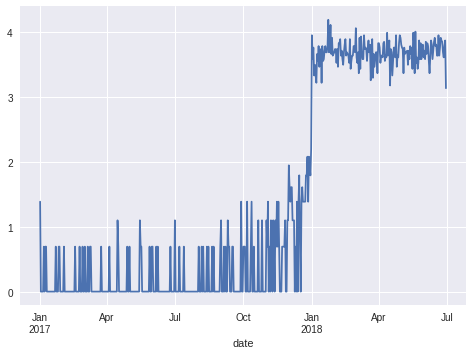

In [0]:
y['log_crime'].plot()
result = adfuller(y['log_crime'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [0]:
entries = y['CMPLNT_NUM'][:-10]
entries_test = y['CMPLNT_NUM'][-10:]

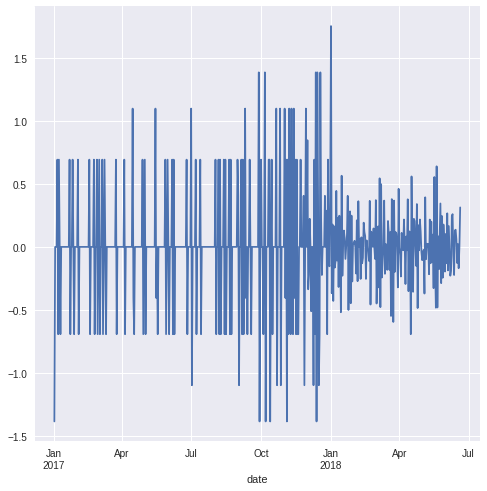

In [0]:


entries_log = np.log(1 + entries)
entries_log_diff1 = (entries_log - entries_log.shift(1)).dropna()


entries_log_diff1.plot(figsize = (8,8))

<Figure size 576x432 with 0 Axes>

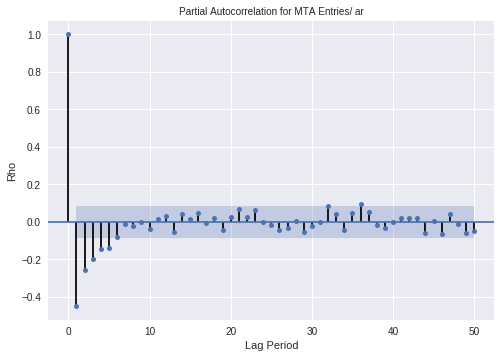

<Figure size 576x432 with 0 Axes>

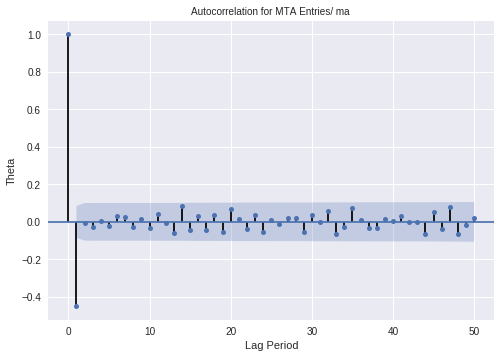

In [0]:
import pylab as pl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = pl.figure(figsize=(8,6))
fig = plot_pacf(entries_log_diff1 ,lags=50)
pl.title('Partial Autocorrelation for ar', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Rho')
pl.savefig('fig2')

# autocorrealation estimate MA parameter
fig = pl.figure(figsize=(8,6))
fig = plot_acf(entries_log_diff1 , lags=50)
pl.title('Autocorrelation for  ma ', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')

In [0]:
from statsmodels.tsa.arima_model import ARIMA,ARMA

# global activ power
#for ARMA package of statsmodels use the lag of the log values to predict
# ar =1, ma =0
model2 = ARIMA(entries_log_diff1, order=(2,0,6))  
results_AR = model2.fit()  
results_AR.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             CMPLNT_NUM   No. Observations:                  535
Model:                     ARMA(2, 6)   Log Likelihood                -209.709
Method:                       css-mle   S.D. of innovations              0.358
Date:                Sun, 10 Feb 2019   AIC                            439.418
Time:                        09:12:08   BIC                            482.240
Sample:                    01-02-2017   HQIC                           456.172
                         - 06-20-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0066      0.004      1.542      0.124      -0.002       0.015
ar.L1.CMPLNT_NUM     0.0273      0.038      0.716      0.474      -0.047       0.102
ar.L2.CMPLNT_NUM    -0.9268        nan        nan        nan         nan         nan
ma.L1.CMPLNT_NUM    -0.7561      0.057    -13.369      0.000      -0.867      -0.645
ma.L2.CMPLNT_NUM     0.9252      0.052     17.961      0.000       0.824       1.026
ma.L3.CMPLNT_NUM    -0.6899      0.059    -11.609      0.000      -0.806      -0.573
ma.L4.CMPLNT_NUM     0.0015      0.069      0.022      0.982      -0.133       0.136
ma.L5.CMPLNT_NUM    -0.0186      0.057     -0.324      0.746      -0.131       0.094
ma.L6.CMPLNT_NUM     0.0624      0.044      1.433      0.152      -0.023       0.148
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0147           -1.0386j            1.0388           -0.2477
AR.2            0.0147           +1.0386j            1.0388            0.2477
MA.1            0.0256           -1.0215j            1.0218           -0.2460
MA.2            0.0256           +1.0215j            1.0218            0.2460
MA.3            1.6028           -0.2604j            1.6238           -0.0256
MA.4            1.6028           +0.2604j            1.6238            0.0256
MA.5           -1.4798           -1.9047j            2.4120           -0.3551
MA.6           -1.4798           +1.9047j            2.4120            0.3551
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


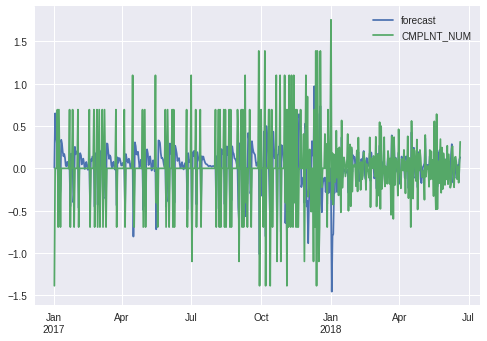

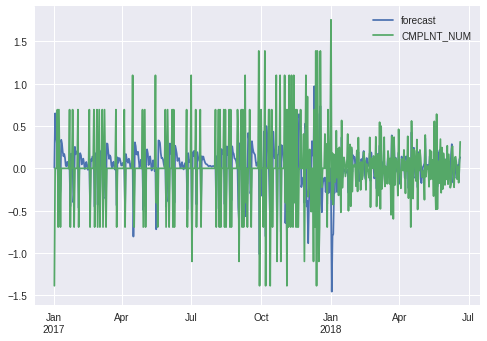

In [0]:

results_AR.plot_predict()

In [0]:
pd.DataFrame(results_AR.resid).describe()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


,0
count,535.000000
mean,-0.004589
std,0.360167
min,-1.392908
25%,-0.200586
50%,-0.068677
75%,0.133773
max,2.050098


<Figure size 576x432 with 0 Axes>

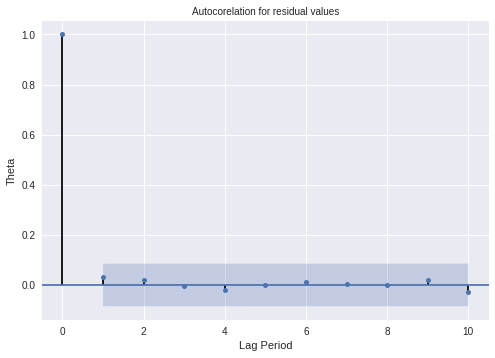

<Figure size 576x432 with 0 Axes>

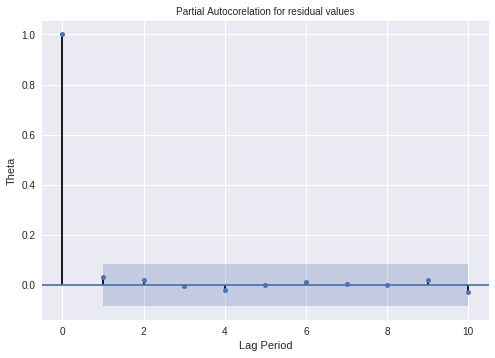

In [0]:
fig = pl.figure(figsize=(8,6))
fig = plot_acf(results_AR.resid, lags=10)
pl.title('Autocorelation for residual values', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')


fig = pl.figure(figsize=(8,6))
fig = plot_pacf(results_AR.resid, lags=10)
pl.title('Partial Autocorelation for residual values', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')

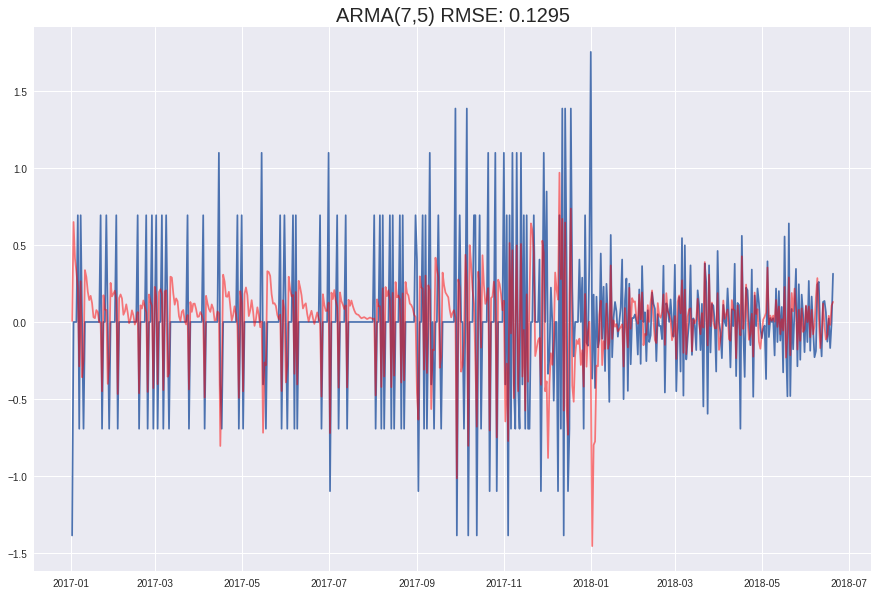

In [0]:
fig = pl.figure(figsize=(15,10))
pl.plot(entries_log_diff1)
pl.plot(results_AR.fittedvalues, color='red',alpha=0.5)


diff = ((results_AR.fittedvalues-entries_log_diff1)**2).mean()
pl.title('ARMA(7,5) RMSE: %.4f'% diff , fontsize=20.)
pl.savefig('fig6')

In [0]:
def inverse_difference(history, yhat, interval=1):
    y_hat_antilog = np.exp(yhat )
    return y_hat_antilog -1 + history[-(interval)]


predictions1= []
predictions2 = []

history1 = [x for x in entries]

test_data_list1 = [x for x in entries_test]


forecast1 = results_AR.forecast(steps=10)[0]
#forecast2 = results_AR2.forecast(steps=10)[0]


In [0]:
results_AR

In [0]:
for i in range(len(forecast1)):

    yhat = inverse_difference(history1, forecast1[i])
    predictions1.append(yhat)
    # observation
    obs = test_data_list1[i]
    history1.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=50.904, Expected= 37
>Predicted=36.961, Expected= 42
>Predicted=41.980, Expected= 49
>Predicted=49.043, Expected= 47
>Predicted=47.022, Expected= 46
>Predicted=45.986, Expected= 39
>Predicted=38.992, Expected= 36
>Predicted=36.026, Expected= 43
>Predicted=43.021, Expected= 47
>Predicted=46.989, Expected= 22


SyntaxError: ignored

RMSE: 10.099


Text(0.5, 1.0, 'plot showing time series predicted entries against the actual entries with RMSE : 10.098973844449496')

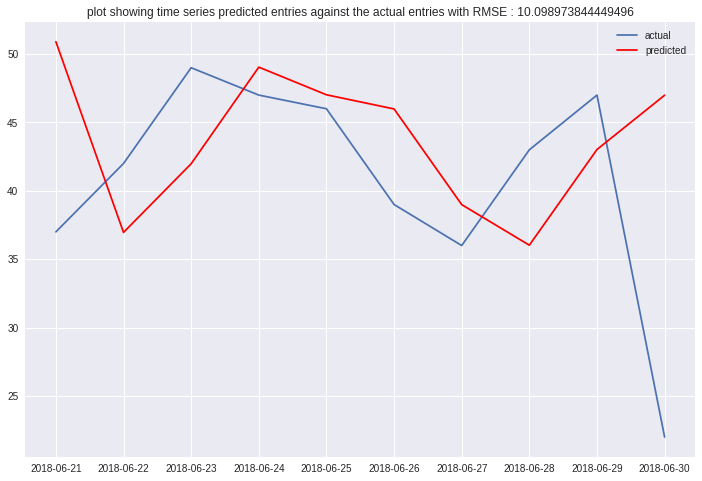

In [0]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(entries_test, predictions1)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
pl.figure(figsize=(12,8))
pl.plot(entries_test,label='actual')
predictions1 = pd.DataFrame(predictions1)
predictions1.set_index(entries_test.index,inplace=True)
pl.plot(predictions1, color='red',label='predicted')
pl.legend()
pl.title('plot showing time series predicted entries against the actual entries with RMSE for precinct 77 : ' + str(rmse))


In [0]:
# Second Highest Precinct Crime Number:
crimes_precinct_type40= crimes_post2006[crimes_post2006['ADDR_PCT_CD'] == 40].groupby(['ADDR_PCT_CD' ,'date_crime'])[['CMPLNT_NUM']].count()
crimes_precinct_type40.reset_index(inplace=True)

In [0]:
precinct_id_2_dmax = crimes_precinct_type40['date_crime'].max()
precinct_id_2_dmin= crimes_precinct_type40['date_crime'].min()



In [0]:
date_rng2 = pd.date_range(start=precinct_id_2_dmin, end=precinct_id_2_dmax, freq='D')

date_rng_df2 = pd.DataFrame(date_rng2, columns=['date'])
date_rng_df2.set_index('date',inplace=True)

crimes_precinct_type40.set_index('date_crime',inplace=True)
crimes_precinct_type40.drop(['ADDR_PCT_CD'],axis=1,inplace=True)

prefinal_datset_precinct40 = date_rng_df2.merge(crimes_precinct_type40, left_index=True, right_index=True, how='left')
prefinal_datset_precinct40.fillna(0,inplace=True)

prefinal_datset_precinct40['log_crime'] = np.log(prefinal_datset_precinct40.CMPLNT_NUM.values + 1)

#prefinal_datset_precinct1['CMPLNT_NUM'].plot()
prefinal_datset_precinct40.reset_index(inplace=True)
prefinal_datset_precinct40['year'] = prefinal_datset_precinct40['date'].dt.year

y =prefinal_datset_precinct44[prefinal_datset_precinct40['year'] >= 2017]
y.set_index('date',inplace=True)

ADF Statistic: -0.597501
p-value: 0.871546
	1%: -3.443
	5%: -2.867
	10%: -2.570


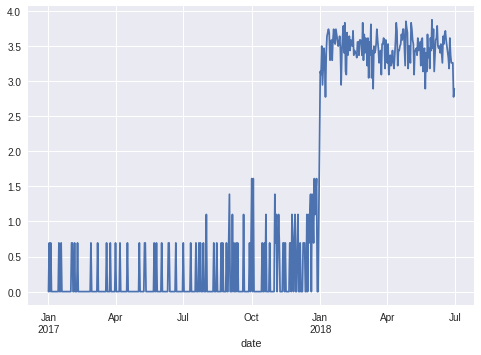

In [0]:
y['log_crime'].plot()
result = adfuller(y['log_crime'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [0]:
entries = y['CMPLNT_NUM'][:-10]
entries_test = y['CMPLNT_NUM'][-10:]

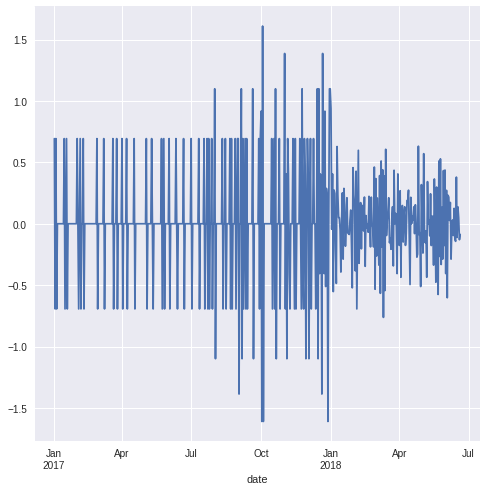

In [0]:
entries_log = np.log(1 + entries)
entries_log_diff1 = (entries_log - entries_log.shift(1)).dropna()
entries_log_diff1.plot(figsize = (8,8))

<Figure size 576x432 with 0 Axes>

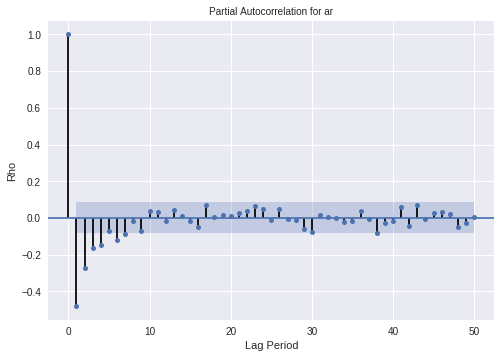

In [0]:
fig = pl.figure(figsize=(8,6))
fig = plot_pacf(entries_log_diff1 ,lags=50)
pl.title('Partial Autocorrelation for ar', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Rho')
pl.savefig('fig2')

<Figure size 576x432 with 0 Axes>

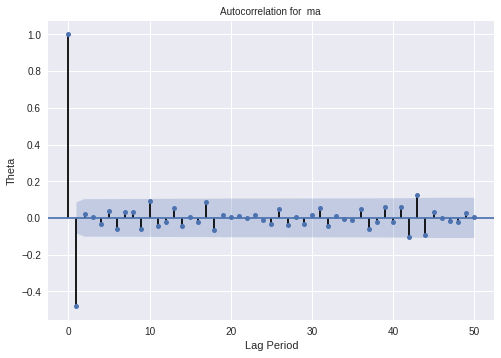

In [0]:
fig = pl.figure(figsize=(8,6))
fig = plot_acf(entries_log_diff1 , lags=50)
pl.title('Autocorrelation for  ma ', fontsize=10)
pl.xlabel('Lag Period')
pl.ylabel('Theta')
pl.savefig('fig3')

In [0]:
model2 = ARIMA(entries_log_diff1, order=(2,0,6))  
results_AR = model2.fit()  
results_AR.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             CMPLNT_NUM   No. Observations:                  535
Model:                     ARMA(2, 6)   Log Likelihood                -209.201
Method:                       css-mle   S.D. of innovations              0.358
Date:                Sun, 10 Feb 2019   AIC                            438.402
Time:                        10:26:36   BIC                            481.224
Sample:                    01-02-2017   HQIC                           455.156
                         - 06-20-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0062      0.004      1.395      0.164      -0.002       0.015
ar.L1.CMPLNT_NUM    -1.4234      0.291     -4.887      0.000      -1.994      -0.853
ar.L2.CMPLNT_NUM    -0.8563      0.361     -2.369      0.018      -1.565      -0.148
ma.L1.CMPLNT_NUM     0.7188      0.293      2.454      0.014       0.145       1.293
ma.L2.CMPLNT_NUM    -0.1354      0.191     -0.710      0.478      -0.509       0.238
ma.L3.CMPLNT_NUM    -0.6125      0.255     -2.400      0.017      -1.113      -0.112
ma.L4.CMPLNT_NUM    -0.0417      0.054     -0.779      0.436      -0.147       0.063
ma.L5.CMPLNT_NUM     0.0030      0.061      0.049      0.961      -0.116       0.122
ma.L6.CMPLNT_NUM     0.0006      0.049      0.013      0.990      -0.095       0.096
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8312           -0.6906j            1.0807           -0.3897
AR.2           -0.8312           +0.6906j            1.0807            0.3897
MA.1           -0.8367           -0.7194j            1.1035           -0.3870
MA.2           -0.8367           +0.7194j            1.1035            0.3870
MA.3            1.3778           -0.0000j            1.3778           -0.0000
MA.4           10.5589           -0.0000j           10.5589           -0.0000
MA.5           -7.5610           -5.8757j            9.5756           -0.3949
MA.6           -7.5610           +5.8757j            9.5756            0.3949
-----------------------------------------------------------------------------
"""

In [0]:
predictions1= []
predictions2 = []

history1 = [x for x in entries]

test_data_list1 = [x for x in entries_test]


forecast1 = results_AR.forecast(steps=10)[0]
#forecast2 = results_AR2.forecast(steps=10)[0]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [0]:
for i in range(len(forecast1)):

    yhat = inverse_difference(history1, forecast1[i])
    predictions1.append(yhat)
    # observation
    obs = test_data_list1[i]
    history1.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=32.060, Expected= 29
>Predicted=29.035, Expected= 27
>Predicted=27.007, Expected= 23
>Predicted=22.987, Expected= 36
>Predicted=36.034, Expected= 28
>Predicted=27.985, Expected= 25
>Predicted=25.014, Expected= 25
>Predicted=25.014, Expected= 25
>Predicted=24.989, Expected= 15
>Predicted=15.025, Expected= 17


RMSE: 6.132


Text(0.5, 1.0, 'plot showing time series predicted entries against the actual entries with RMSE for precinct 40 : 6.132203752860657')

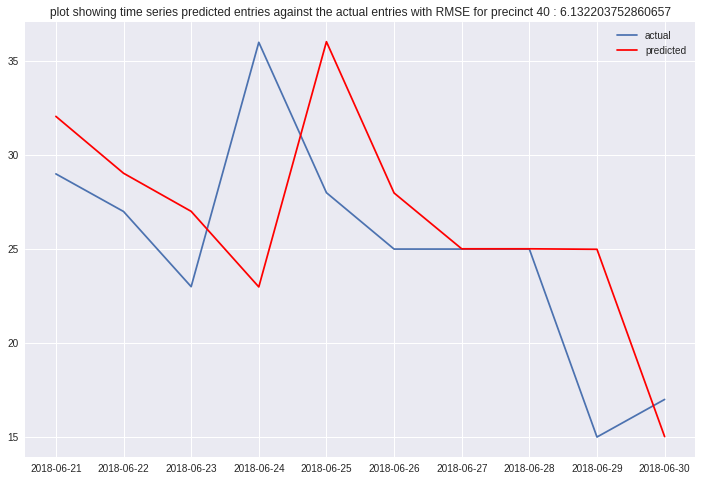

In [0]:
mse = mean_squared_error(entries_test, predictions1)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)
pl.figure(figsize=(12,8))
pl.plot(entries_test,label='actual')
predictions1 = pd.DataFrame(predictions1)
predictions1.set_index(entries_test.index,inplace=True)
pl.plot(predictions1, color='red',label='predicted')
pl.legend()
pl.title('plot showing time series predicted entries against the actual entries with RMSE for precinct 40 : ' + str(rmse))


In [0]:
crimes_precinct_type.head()

,ADDR_PCT_CD,KY_CD,date_crime,hour,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,year,yearoc,crime_date
0,1,101,2018-03-08,6,1,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,104,2014-01-01,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,104,2014-11-01,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,104,2014-12-01,12,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,104,2015-09-04,21,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [0]:
crimes_precinct_final  = crimes_precinct_type[['ADDR_PCT_CD',	'KY_CD'	, 'date_crime',	'hour'	,'CMPLNT_NUM']]

In [0]:
crimes_precinct_final.to_csv('crime_data.csv')
from google.colab import files
files.download('crime_data.csv') 

In [0]:
# making data stationaary/ supervised:

crimes_precinct_final.head()

,ADDR_PCT_CD,KY_CD,date_crime,hour,CMPLNT_NUM
0,1,101,2018-03-08,6,1
1,1,104,2014-01-01,0,1
2,1,104,2014-11-01,0,1
3,1,104,2014-12-01,12,1
4,1,104,2015-09-04,21,1


In [0]:
crimes_precinct_final.groupby(['ADDR_PCT_CD' , 'date_crime','hour' ]).count().reset_index().sort_values(by=['CMPLNT_NUM'], ascending = False)

,ADDR_PCT_CD,date_crime,hour,KY_CD,CMPLNT_NUM
144423,115,2018-06-20,19,9,9
94891,75,2018-04-15,23,7,7
92434,73,2018-06-09,0,7,7
50272,44,2018-02-18,17,7,7
40836,40,2018-04-22,2,7,7
94289,75,2018-03-14,14,7,7
48601,43,2018-05-12,18,7,7
41432,40,2018-05-29,9,7,7
99393,77,2018-06-22,22,7,7
41460,40,2018-05-31,1,7,7


In [0]:
crimes_precinct_final['KY_CD'].dtypes

dtype('int64')

In [0]:
crimes_precinct_final.head()

,ADDR_PCT_CD,KY_CD,date_crime,hour,CMPLNT_NUM
0,1,101,2018-03-08,6,1
1,1,104,2014-01-01,0,1
2,1,104,2014-11-01,0,1
3,1,104,2014-12-01,12,1
4,1,104,2015-09-04,21,1


In [0]:
crimes_precinct_final['previous_incidents'] = crimes_precinct_final['CMPLNT_NUM'].shift(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
crime_75_last_day = crimes_precinct_final[crimes_precinct_final['ADDR_PCT_CD'] == 75].sort_values(by='date_crime',ascending=False).iloc[[0]]
cols, names = list(), list()
# input sequence (t-n, ... t-1)
for i in range(1,25):
		cols.append(crimes_precinct_final['CMPLNT_NUM'].shift(i-1))
		names += [('incident_lagged%d' % (i-1))]

# put it all together
agg = pd.concat(cols, axis=1)
agg.columns = names


In [0]:
crimes_75_latest = crimes_precinct_final[crimes_precinct_final['ADDR_PCT_CD'] == 75].sort_values(by=['date_crime'],ascending=False).iloc[0:22]
crimes_75_ordered = crimes_75_latest.sort_values(by=['hour'])
crimes_75_ordered = crimes_75_ordered.groupby(by=['hour'])[['CMPLNT_NUM']].sum()

In [0]:
cols, names = list(), list()
# input sequence (t-n, ... t-1)
for i in range(1,25):
		cols.append(crimes_precinct_final['CMPLNT_NUM'].shift(i-1))
		names += [('incident_lagged%d' % (i-1))]

# put it all together
agg_75 = pd.concat(cols, axis=1)
agg_75.columns = names

In [0]:
# one hot encode precinct value
crimes_75_ordered.head()

,CMPLNT_NUM
hour,
0,2
1,3
4,1
6,1
7,1


In [0]:
#lag the crime values by 24 hours
cols, names = list(), list()
# input sequence (t-n, ... t-1)
for i in range(1,25):
		cols.append(crimes_precinct_final['CMPLNT_NUM'].shift(i-1))
		names += [('incident_lagged%d' % (i-1))]

# put it all together
agg = pd.concat(cols, axis=1)
agg.columns = names




In [0]:
agg.shape

(210878, 24)

In [0]:
crimes_precinct_final.shape

(210878, 5)

In [0]:
lagged_crime_df = pd.concat([crimes_precinct_final,agg], axis=1)

In [0]:
crimes_precinct_final.head()

precinct_75 = crimes_precinct_final[crimes_precinct_final['KY_CD'] == 75]

In [0]:
precinct_75

,ADDR_PCT_CD,KY_CD,date_crime,hour,CMPLNT_NUM


In [0]:
lagged_crime_df.fillna(1, inplace=True)

In [0]:
lagged_crime_df['ADDR_PCT_CD'] = lagged_crime_df['ADDR_PCT_CD'].astype(str)


In [0]:
one_hot_precinct = pd.get_dummies(lagged_crime_df['ADDR_PCT_CD'], prefix='ADDR_PCT_CD')
one_hot_precinct

,ADDR_PCT_CD_1,ADDR_PCT_CD_10,ADDR_PCT_CD_100,ADDR_PCT_CD_101,ADDR_PCT_CD_102,ADDR_PCT_CD_103,ADDR_PCT_CD_104,ADDR_PCT_CD_105,ADDR_PCT_CD_106,ADDR_PCT_CD_107,...,ADDR_PCT_CD_77,ADDR_PCT_CD_78,ADDR_PCT_CD_79,ADDR_PCT_CD_81,ADDR_PCT_CD_83,ADDR_PCT_CD_84,ADDR_PCT_CD_88,ADDR_PCT_CD_9,ADDR_PCT_CD_90,ADDR_PCT_CD_94
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
one_hot_oc = pd.get_dummies(lagged_crime_df['KY_CD'], prefix='KY_CD')

,KY_CD_101,KY_CD_103,KY_CD_104,KY_CD_105,KY_CD_106,KY_CD_107,KY_CD_109,KY_CD_110,KY_CD_111,KY_CD_112,...,KY_CD_363,KY_CD_364,KY_CD_365,KY_CD_366,KY_CD_571,KY_CD_572,KY_CD_578,KY_CD_675,KY_CD_677,KY_CD_678
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
crime_sup = pd.concat([lagged_crime_df, one_hot_oc, one_hot_precinct], axis=1)

In [0]:
crime_sup['KY_CD'].unique()

array([101, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 116, 117,
       118, 121, 126, 230, 231, 232, 233, 235, 236, 238, 340, 341, 343,
       344, 347, 348, 351, 352, 353, 355, 358, 359, 361, 364, 365, 578,
       678, 124, 125, 675, 572, 120, 363, 115, 677, 356, 342, 350, 366,
       345, 346, 119, 354, 103, 123, 237, 571, 122])

In [0]:
crime_sup.to_csv('onehotenc_allcols.csv')

In [0]:
files.download('onehotenc_allcols.csv')

In [0]:
crime_sup_drop = crime_sup.drop(['ADDR_PCT_CD'	,'KY_CD'], axis=1)

In [0]:
crime_sup_drop.head()

NameError: ignored

In [0]:
crime_sup_drop.columns


NameError: ignored

In [0]:
crime_sup_drop.to_csv('onehotenc_lagged.csv')

In [0]:
files.download('onehotenc_lagged.csv')

In [0]:
crimes_count_Categs = crimes_precinct_final.groupby(['ADDR_PCT_CD', 'KY_CD']).count()

In [0]:
crimes_count_Categs.reset_index(inplace=True)

In [0]:
idx = crimes_count_Categs.groupby(['ADDR_PCT_CD'], sort=False)['hour'].transform(max) == crimes_count_Categs['hour']

In [0]:
crimes_count_Categs[idx]

,ADDR_PCT_CD,KY_CD,date_crime,hour,CMPLNT_NUM,previous_incidents
24,1,341,965,965,965,965
65,5,341,398,398,398,398
104,6,341,522,522,522,522
141,7,341,273,273,273,273
182,9,341,540,540,540,540
201,10,109,352,352,352,352
260,13,341,873,873,873,873
302,14,341,1253,1253,1253,1253
343,17,341,509,509,509,509
386,18,341,857,857,857,857


In [0]:
crimes_count_Categs.head()

,ADDR_PCT_CD,KY_CD,date_crime,hour,CMPLNT_NUM,previous_incidents
0,1,101,1,1,1,0
1,1,104,14,14,14,14
2,1,105,36,36,36,36
3,1,106,28,28,28,28
4,1,107,32,32,32,32
